In [1]:
# PyTorch workflow fundamentals
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0'

In [7]:
# Create knows parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [8]:
# create test/train split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [9]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

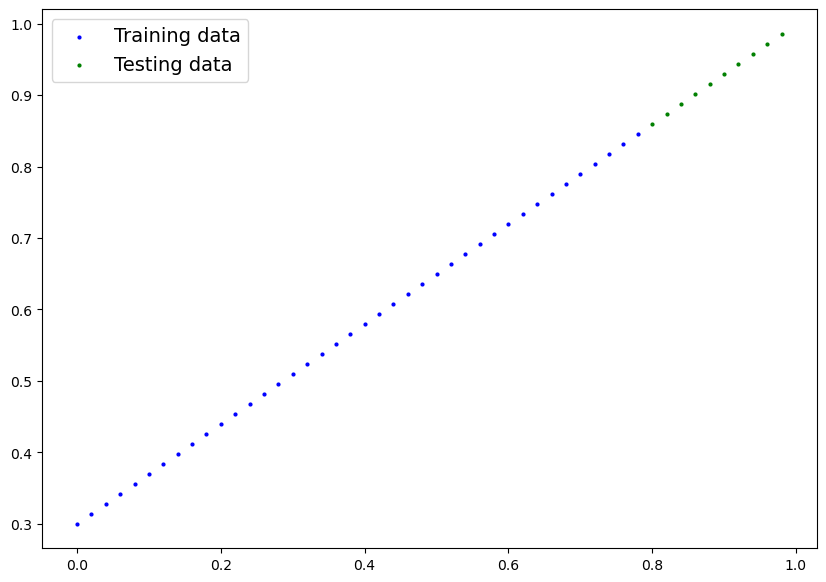

In [10]:
plot_predictions()

In [11]:
# create a linear regression model class

class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                    requires_grad=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [12]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)


In [15]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


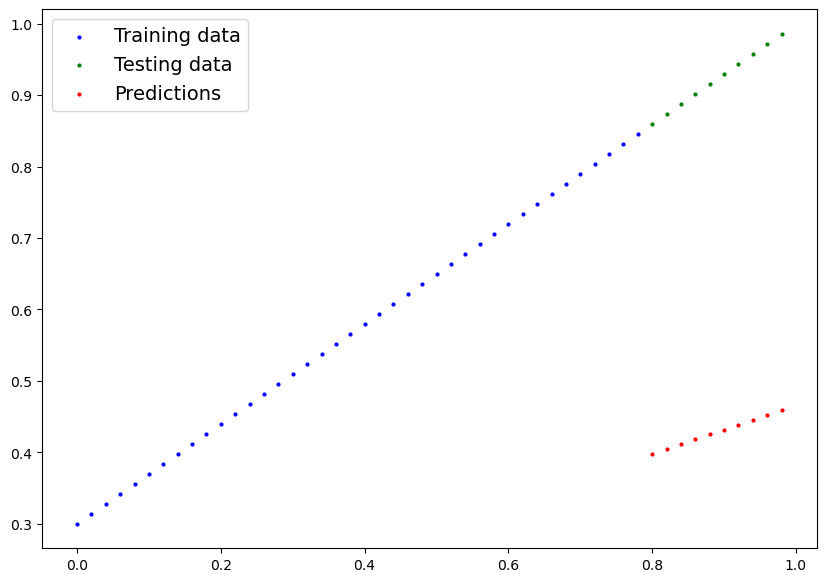

In [16]:
plot_predictions(predictions=y_preds)

In [17]:
# Create loss function
loss_fn = nn.L1Loss()

# create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)

In [18]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

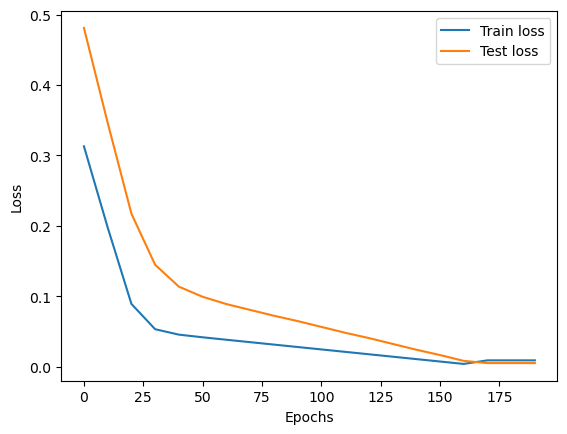

In [19]:
# plot loss curbes
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [20]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [21]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [22]:
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01workflowfundModel0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01workflowfundModel0.pth


In [23]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
# load the model
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model.eval()

with torch.inference_mode():
    pred = loaded_model(X_test)

pred == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [76]:
# exersize
# Create a straight line dataset using the linear regression formula (weight * X + bias).
import random
import math
import numpy as np

def sin(num):
    return math.sin(num * 2.5 + 5)

sin_v = np.vectorize(sin)


X1 = torch.arange(0, 10, 0.05)

y1 = X1 * 0.3 + 0.9 

y1 = torch.from_numpy(sin_v(y1.numpy()))



X1[:10], y1[:10]

(tensor([0.0000, 0.0500, 0.1000, 0.1500, 0.2000, 0.2500, 0.3000, 0.3500, 0.4000,
         0.4500]),
 tensor([0.8231, 0.8438, 0.8633, 0.8816, 0.8987, 0.9145, 0.9290, 0.9423, 0.9542,
         0.9647], dtype=torch.float64))

In [77]:
train_split = int(0.8 * len(X1))

X1_train, y1_train = X1[:train_split], y1[:train_split]
X1_test, y1_test = X1[train_split:], y1[train_split:]


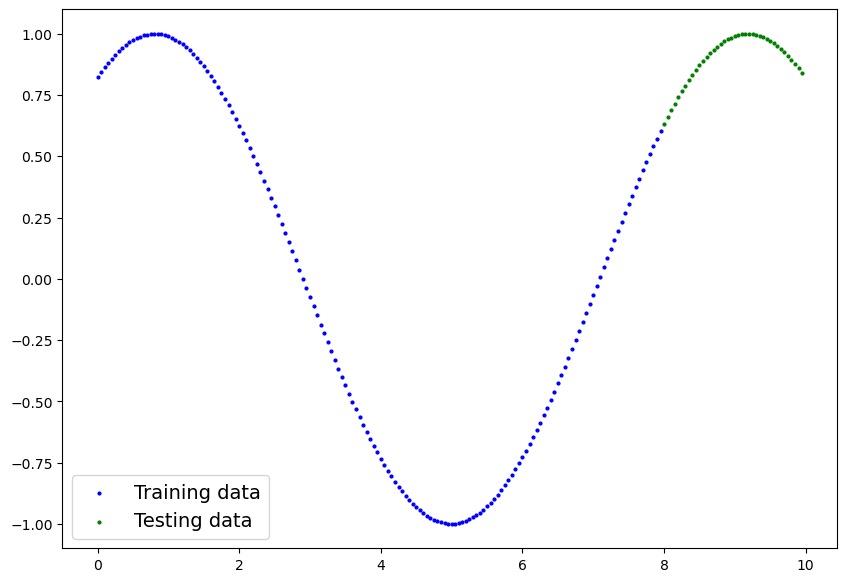

In [78]:
plot_predictions(X1_train, y1_train, X1_test, y1_test)

In [79]:
# build model

class LinearRegModelCustom(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, 
                                               dtype=torch.float, 
                                               requires_grad=True))

        self.bias = nn.Parameter(torch.rand(1, 
                                            dtype=torch.float, 
                                            requires_grad=True))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        
        return x * self.weights  + self.bias

In [80]:
newModel = LinearRegModelCustom()
newModel.state_dict()

OrderedDict([('weights', tensor([0.5315])), ('bias', tensor([0.1587]))])

In [81]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(newModel.parameters(), lr=0.01)

In [82]:
epoch = 1000

for epoch in range(epoch):

    newModel.train()

    pred = newModel(X1_train)

    loss = loss_fn(pred, y1_train.type(torch.float))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    newModel.eval()

    with torch.inference_mode():
        test_pred = newModel(X1_test)

        test_loss = loss_fn(test_pred, y1_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 2.4567770957946777 | Test loss: 3.6888471975827377
Epoch: 20 | Train loss: 0.5889641046524048 | Test loss: 1.2851742468869525
Epoch: 40 | Train loss: 0.5719102025032043 | Test loss: 1.5483440607881385
Epoch: 60 | Train loss: 0.5662630796432495 | Test loss: 1.6000663504099684
Epoch: 80 | Train loss: 0.5610855221748352 | Test loss: 1.609980790326579
Epoch: 100 | Train loss: 0.5559149384498596 | Test loss: 1.6269886821603614
Epoch: 120 | Train loss: 0.5510746240615845 | Test loss: 1.6710327670073348
Epoch: 140 | Train loss: 0.5462766885757446 | Test loss: 1.6931618020033674
Epoch: 160 | Train loss: 0.5415045022964478 | Test loss: 1.7076618433093862
Epoch: 180 | Train loss: 0.5371226668357849 | Test loss: 1.7192475631928281
Epoch: 200 | Train loss: 0.5327513217926025 | Test loss: 1.7415729239678222
Epoch: 220 | Train loss: 0.5287002325057983 | Test loss: 1.774586589643939
Epoch: 240 | Train loss: 0.524665117263794 | Test loss: 1.811034925291522
Epoch: 260 | Train los

In [83]:
# 1. Set the model in evaluation mode
newModel.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = newModel(X1_test)
y_preds

tensor([-1.1358, -1.1490, -1.1622, -1.1754, -1.1886, -1.2018, -1.2150, -1.2282,
        -1.2413, -1.2545, -1.2677, -1.2809, -1.2941, -1.3073, -1.3205, -1.3337,
        -1.3469, -1.3601, -1.3733, -1.3864, -1.3996, -1.4128, -1.4260, -1.4392,
        -1.4524, -1.4656, -1.4788, -1.4920, -1.5052, -1.5184, -1.5315, -1.5447,
        -1.5579, -1.5711, -1.5843, -1.5975, -1.6107, -1.6239, -1.6371, -1.6503])

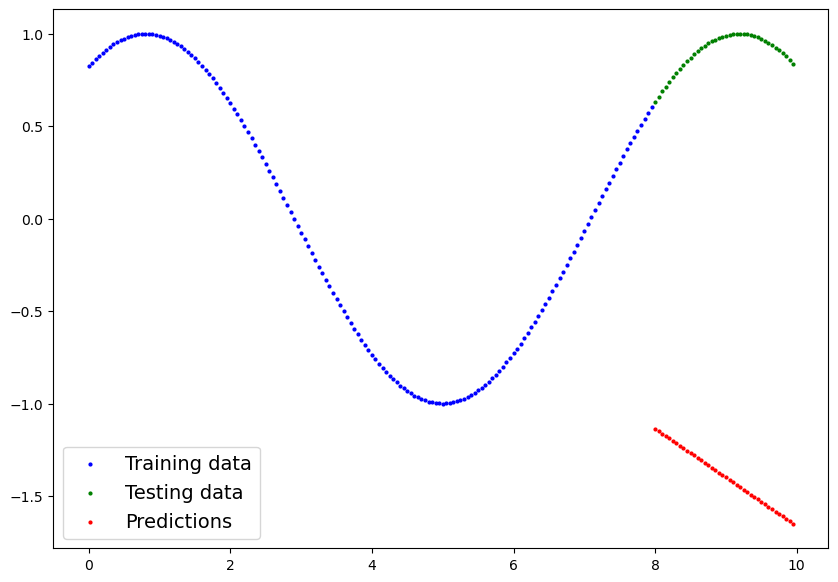

In [84]:
plot_predictions(X1_train, y1_train, X1_test, y1_test, y_preds)

In [88]:
newModel.state_dict()

OrderedDict([('weights', tensor([0.2865])), ('bias', tensor([1.3329]))])